# Lab 7 and 8

Sierra Wilde and Michael Higgins

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
from scipy import stats
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Lab 7

I am loading the data from the h5 files, using the library 'h5py':

In [2]:
#opening the data files
hfhiggs = h5py.File('higgs_100000_pt_1000_1200.h5', 'r')
hfqcd = h5py.File('qcd_100000_pt_1000_1200.h5', 'r')

In [3]:
#loading the data from the files into an array so that it can be used in the notebook
higgs_data = np.array(hfhiggs.get('higgs_100000_pt_1000_1200'))
qcd_data = np.array(hfqcd.get('qcd_100000_pt_1000_1200'))

In order to link the names of the parameters to each column, I am making a pandas dataframe. This way I can call on each column by its parameter name, which makes things easier to keep track of. The pandas dataframe also makes it easy to cut the data based on paramater values, which I will be doing later.

In [201]:
#creating a table of the Higgs data
higgs_table = pd.DataFrame(higgs_data)
higgs_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [200]:
#creating a table of the background data
qcd_table = pd.DataFrame(qcd_data)
qcd_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

## Problem 1

I am plotting a histogram of the mass distribution for the Higgs and QCD data. I have normalized the QCD data to 2000 and the Higgs data to 50 by using the weights parameter in plt.hist(). The simulated datasets are the same size, but in real life, there would be a much higher proportion of QCD background data. Normalizing the two datasets to their respective values gives the correct proportions of magnitude, but doesn't require losing any information like removing Higgs events would. I am also plotting a true Poisson pmf that has the same mean as the background to see if I can use this as a pmf to describe the background distribution.

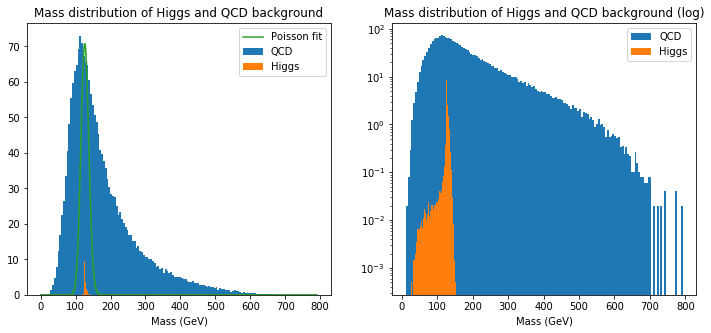

In [6]:
#plotting Higgs and QCD masses, and Poisson pmf
x = np.arange(0, qcd_table['mass'].max())
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].hist(qcd_table['mass'], bins=150, label='QCD', weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))
ax[0].hist(higgs_table['mass'], bins=150, label='Higgs', weights=50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
ax[0].step(x, 2000 * stats.poisson.pmf(x, qcd_table['mass'].mean()-50), label='Poisson fit')
t= np.arange(0, 70)
#ax[0].step(t*10+70, 450*stats.poisson.pmf(t, 6))
ax[0].legend()
ax[0].set_title('Mass distribution of Higgs and QCD background')
ax[0].set_xlabel('Mass (GeV)')
ax[0].set_label('Number of occurrences')
ax[1].hist(qcd_table['mass'], bins=150, label='QCD', weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))
ax[1].hist(higgs_table['mass'], bins=150, label='Higgs', weights=50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
ax[1].set_title('Mass distribution of Higgs and QCD background (log)')
ax[1].set_xlabel('Mass (GeV)')
ax[1].set_label('Number of occurrences (log)')
ax[1].set_yscale('log')
ax[1].legend();

Distribution of the Higgs mass against the QCD background, both on normal and logarithmic scales. The Higgs data is normalized to 50, and the QCD to 2000.

Normalizing the data to 50 and 2000 for the higgs and qcd data respectively, using np.histogram instead of plt.hist(). This gives me the option to use the correctly weighted data without having to make a plot each time if needed.

In [7]:
higgs_hist = np.histogram(higgs_table['mass'], bins = 150, weights = 50 * np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
qcd_hist = np.histogram(qcd_table['mass'], bins=150, weights=2000 * np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))

I want to find the significance of the Higgs mass against the QCD mass distribution. In order to do this, I must first find what the Higgs mass was measure to be. This corresponds to the mode of the Higgs mass data, or the middle to the spike in the distribution. I am using Poisson statistics to find the significance. I am calculating the probability of measuring the Higgs mass based on the Poisson pmf, and then finding the $\sigma$ associated with that probability on a standard normal distribution.

In [8]:
#finding the mode of the Higgs data
higgs_peak = higgs_hist[1][np.where(higgs_hist[0] == higgs_hist[0].max())]
print(higgs_peak)

[124.73021713]


In [9]:
probability = stats.poisson.sf(higgs_peak, qcd_table['mass'].mean())
sigma = stats.norm.isf(probability)

print('The sigma value of the Higgs measurement is: {}'.format(sigma))

The sigma value of the Higgs measurement is: [-4.17639903]


Calculating $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$, which can be used as an approximate significance threshold metric:

In [10]:
50/np.sqrt(2000)

1.118033988749895

$\frac{N_{Higgs}}{\sqrt{N_{QCD}}} = 1.12$

I will be using this relation to estimate the significance for the rest of the lab.

## Problem 2

For reference, I am plotting the mass histograms again. This time I am using the objects I made with np.histogram(), instead of plt.hist(), in order to ensure the same results from each.

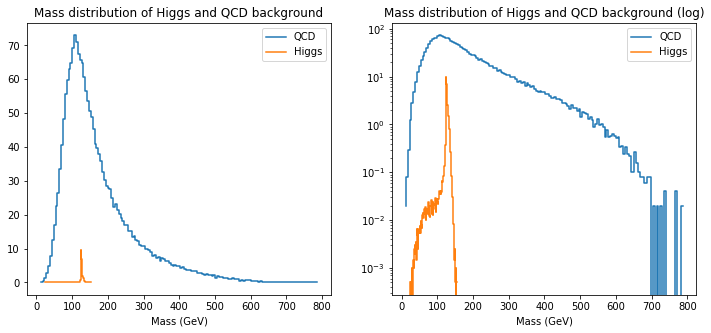

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].step(qcd_hist[1][:-1], qcd_hist[0], label='QCD')
ax[0].step(higgs_hist[1][:-1], higgs_hist[0], label='Higgs')
ax[0].set_title('Mass distribution of Higgs and QCD background')
ax[0].set_xlabel('Mass (GeV)')
ax[0].set_label('Number of occurrences')
ax[0].legend()
ax[1].step(qcd_hist[1][:-1], qcd_hist[0], label='QCD')
ax[1].step(higgs_hist[1][:-1], higgs_hist[0], label='Higgs')
ax[1].set_yscale('log')
ax[1].set_title('Mass distribution of Higgs and QCD background (log)')
ax[1].set_xlabel('Mass (GeV)')
ax[1].set_label('Number of occurrences (log)')
ax[1].legend();

Distibution of the Higgs and QCD masses normalized to 50 and 2000 respectively, again.

I am going to make cuts at 100 and the maximum Higgs value, because that is where most of the Higgs data is. I want to keep as much of the Higgs data as possible. I am first going to leave most of the peak and see how the significance is affected. If the significance is still low, I will make more cuts around the true Higgs mass, which is 125 GeV.

In [12]:
print(higgs_table['mass'].max())

154.6136749993263


I am creating a function that uses a mask to select events from the pandas dataframes where the mass was in between a certain range of values. First I am choosing 100 GeV and 154.61 GeV, then I will make more cuts if needed. The selected data now has a different normalized value. The data has to be kept in the same proportions in order for the cutting to make sense. This means that if 50% of the background data was cut, that the new normalization value must be 50% of what it was originally, which is 2000. This will change the N values, and therefore change the significance of the Higgs data. I have also made a function that will return the new weight of the cut data.

In [117]:
#mass cut function, taking the dataset and the upper and lower bounds
def mass_cut(data, lower, upper):
    mask = (data['mass'] > lower) & (data['mass'] < upper)
    cut = data[mask]
    return cut

#weight function, taking the original data, the cut data, and the original normalized value
def new_weight(data, cut_data, original_weight):
    weight = original_weight * len(cut_data) / len(data)
    return weight

In [118]:
#doing the first cut: selecting masses between 100 and the Higgs max
higgs_1cut = mass_cut(higgs_table, 100, higgs_table['mass'].max())
qcd_1cut = mass_cut(qcd_table, 100, higgs_table['mass'].max())

In [326]:
#finding the proportion of data kept
higgs_weight1 = new_weight(higgs_table, higgs_1cut, 50)
qcd_weight1 = new_weight(qcd_table, qcd_1cut, 2000)
print(higgs_weight1)
print(qcd_weight1)

49.028
672.98


Here the new $N_{Higgs}$ is about 49 and the new $N_{QCD}$ is about 673. The QCD data was reduced much more than the Higgs data, which is what I want. This makes $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$, and thus the significance greater.

Calculating $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$ for the new amounts of data:

I am rounding up for the number of QCD and rounding down for the number of Higgs, because this makes the significance estimate on the lower side. It is better to have a slightly lower significance than a slightly higher significance, because that will more likely ensure discovery when a 5$\sigma$ signal is reached.

In [16]:
cut1_sig = 49/np.sqrt(673)
print('The new significance of the Higgs data after the first cut: {}'.format(cut1_sig))

The new significance of the Higgs data after the first cut: 1.8888111940046644


This significance is only marginally better than doing no cuts at all. I am going to try to cut more of the values, until I can get as close to a 5$\sigma$ significance as possible, while maximizing the amount of Higgs data I keep, using the same procedure as for the first cut.

In [120]:
higgs_2cut = mass_cut(higgs_table, 110, 140)
qcd_2cut = mass_cut(qcd_table, 110, 140)

In [327]:
higgs_weight2 = new_weight(higgs_table, higgs_2cut, 50)
qcd_weight2 = new_weight(qcd_table, qcd_2cut, 2000)
print(higgs_weight2)
print(qcd_weight2)

48.327
390.26


In [20]:
cut2_sig = 48/np.sqrt(391)
print('The new significance of the Higgs data after the second cut: {}'.format(cut2_sig))

The new significance of the Higgs data after the second cut: 2.427464339636033


In [122]:
higgs_3cut = mass_cut(higgs_table, 115, 135)
qcd_3cut = mass_cut(qcd_table, 115, 135)

In [328]:
higgs_weight3 = new_weight(higgs_table, higgs_3cut, 50)
qcd_weight3 = new_weight(qcd_table, qcd_3cut, 2000)
print(higgs_weight3)
print(qcd_weight3)

46.2655
261.58


In [24]:
cut3_sig = 46/np.sqrt(262)
print('The new significance of the Higgs data after the third cut: {}'.format(cut3_sig))

The new significance of the Higgs data after the third cut: 2.841889490789991


In [124]:
higgs_4cut = mass_cut(higgs_table, 120, 130)
qcd_4cut = mass_cut(qcd_table, 120, 130)

In [186]:
higgs_weight4 = new_weight(higgs_table, higgs_4cut, 50)
qcd_weight4 = new_weight(qcd_table, qcd_4cut, 2000)
print(higgs_weight4)
print(qcd_weight4)

37.9145
128.28


In [28]:
cut4_sig = 37/np.sqrt(129)
print('The new significance of the Higgs data after the fourth cut: {}'.format(cut4_sig))

The new significance of the Higgs data after the fourth cut: 3.2576683534048083


After cutting the data until it contains mass of only $\pm$5 GeV away from the true Higgs boson mass, 125 GeV, the significance has only gone up to 3.26$\sigma$. I am going to plot histograms of each of the cuts to see how much of the peak was lost. I don't want to cut anymore of the data just yet, because I don't want to cut too much of the peak. There still needs to be enough Higgs data so that there are enough stats for a signal to be determined.

In [129]:
#making dictionaries of each of the weights and cuts to make plotting a bit more efficient
higgs_mass_cuts = {'Cut 1':higgs_1cut['mass'], 'Cut 2':higgs_2cut['mass'], 'Cut 3':higgs_3cut['mass'], 'Cut 4':higgs_4cut['mass']}
qcd_mass_cuts = {'Cut 1':qcd_1cut['mass'], 'Cut 2':qcd_2cut['mass'], 'Cut 3':qcd_3cut['mass'], 'Cut 4':qcd_4cut['mass']}
higgs_weights = {'Cut 1':higgs_weight1, 'Cut 2':higgs_weight2, 'Cut 3':higgs_weight3, 'Cut 4':higgs_weight4}
qcd_weights = {'Cut 1':qcd_weight1, 'Cut 2':qcd_weight2, 'Cut 3':qcd_weight3, 'Cut 4':qcd_weight4}

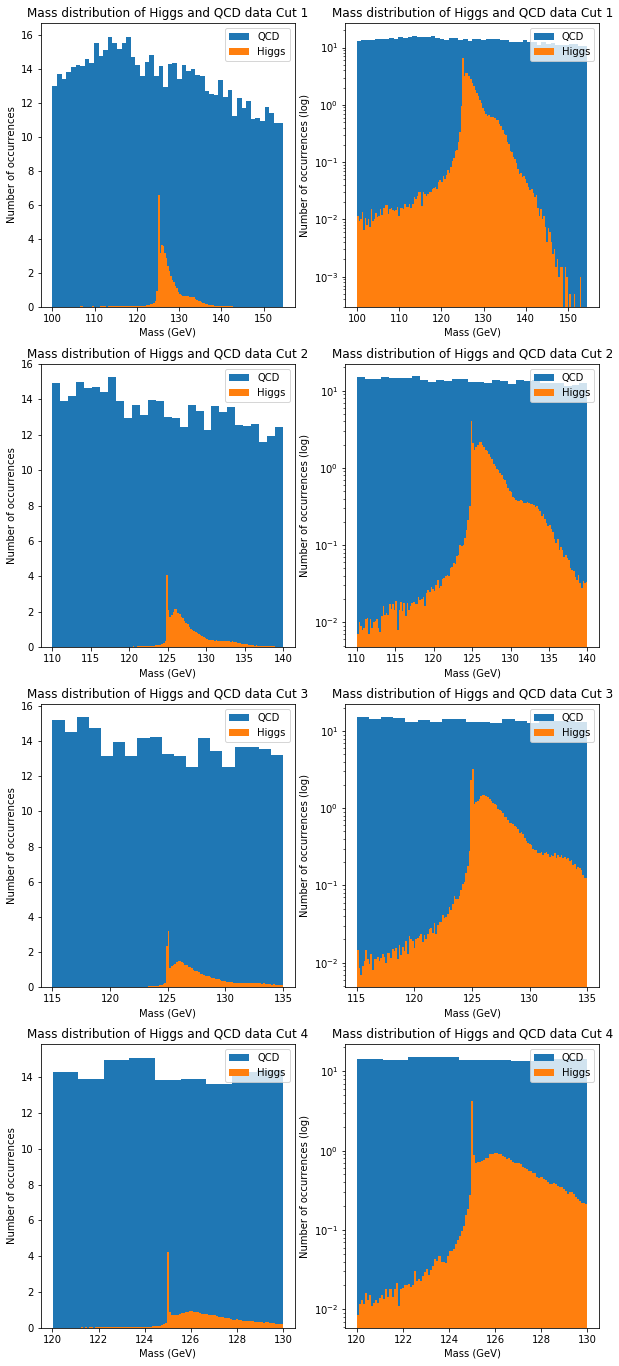

In [132]:
#looping through the dictionaries to plot the new distributions of mass normalized to their respective values
number = len(higgs_mass_cuts)
fig, axes = plt.subplots(number, 2, figsize = (10, 6*number))
for h, q, hw, qw, ax in zip(higgs_mass_cuts.items(), qcd_mass_cuts.items(), higgs_weights.items(), qcd_weights.items(), axes):
    ax[0].set_title('Mass distribution of Higgs and QCD data {}'.format(h[0]))
    ax[0].hist(q[1], label='QCD', bins=int(150*len(q[1])/100000), weights=qw[1]* np.ones(len(q[1])) / len(q[1]))
    ax[0].hist(h[1], label='Higgs', bins=int(150*len(h[1])/100000), weights=hw[1]* np.ones(len(h[1])) / len(h[1]))
    ax[0].set_xlabel('Mass (GeV)')
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('Mass distribution of Higgs and QCD data {}'.format(h[0]))
    ax[1].hist(q[1], label='QCD', bins=int(150*len(q[1])/100000), weights=qw[1]* np.ones(len(q[1])) / len(q[1]))
    ax[1].hist(h[1], label='Higgs', bins=int(150*len(h[1])/100000), weights=hw[1]* np.ones(len(h[1])) / len(h[1]))
    ax[1].set_yscale('log')
    ax[1].set_xlabel('Mass (GeV)')
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distribution of the Higgs mass in comparison to the background after multiple cuts. Each noramlized to their appropriate value determined on the proportion of data from each set remaining.

The more mass cuts, the greater the significance will be. However after a certain number of cuts, there will be so little Higgs data, that it does not make sense to do any further analysis, because the stats are so low. There still needs to be enough Higgs data in order to justify a discovery. After looking at the histograms above, I think it will be more helpful to eliminate data based on other parameters, other than mass.

## Problem 3

Here are the plots of all the rest of the data before any cuts are made. I am looping through each column of the pandas dataframes and using plt.hist() normalized to the appropriate weights.

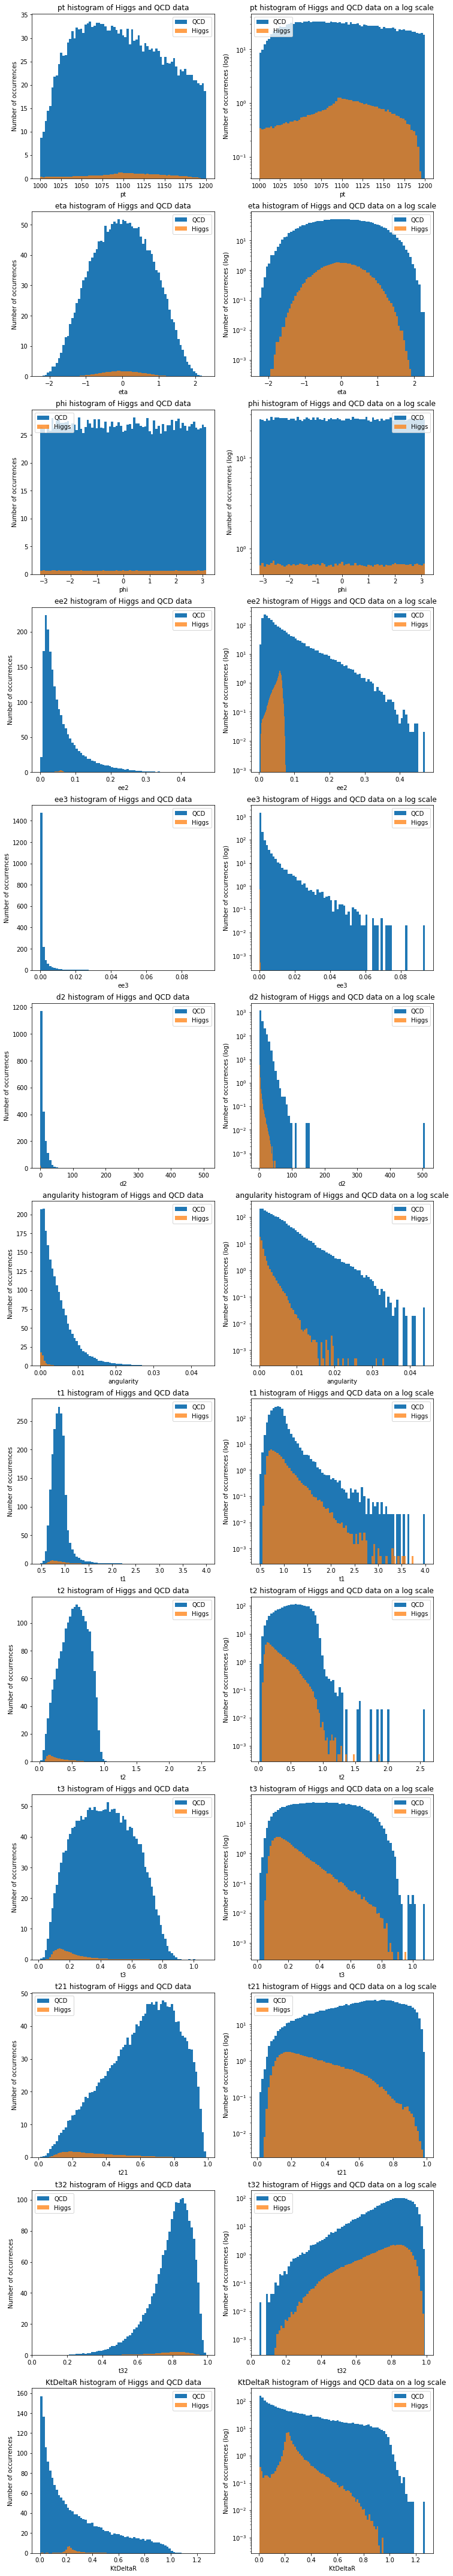

In [31]:
#creating histograms of the rest of the columns in the data
fig, axes = plt.subplots(13, 2, figsize=(12, 6*13))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns[:3].append(higgs_table.columns[4:])):
    ax[0].set_title('{} histogram of Higgs and QCD data'.format(column))
    ax[0].hist(qcd_table[column], bins=75, label='QCD', weights=2000*np.ones(len(qcd_table[column])) / len(qcd_table[column]))
    ax[0].hist(higgs_table[column], bins=75, label='Higgs', weights=50*np.ones(len(higgs_table[column])) / len(higgs_table[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data on a log scale'.format(column))
    ax[1].hist(qcd_table[column], bins=75, label='QCD', weights=2000*np.ones(len(qcd_table[column])) / len(qcd_table[column]))
    ax[1].hist(higgs_table[column], bins=75, label='Higgs', weights=50*np.ones(len(higgs_table[column])) / len(higgs_table[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of the rest of the parameters in the LHC simulation.

Before any mass cuts, it looks like making cuts in $e_2$ and $e_3$ would give the best significance. A large amount of the QCD data could be eliminated without removing any Higgs data. This will minimize $N_{QCD}$ without affecting $N_{Higgs}$, which will maximize the ratio $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$. These distributions will most likely change after the mass cuts, and therfore no cuts should be made based on this data.

Plots of the all the parameters, besides mass, of the LHC data after the mass cut was made. This is to see how the distributions change. I loop through each parameter (not including mass) of the cut data and make a histogram. Each parameter might not be completely independent, and so each cut might systematically change the shape of each distribution, not just the overall number of events. Looking at the new distributions will help me in determing other features from which to cut.

In [226]:
higgs_table_cut = higgs_4cut
qcd_table_cut = qcd_4cut

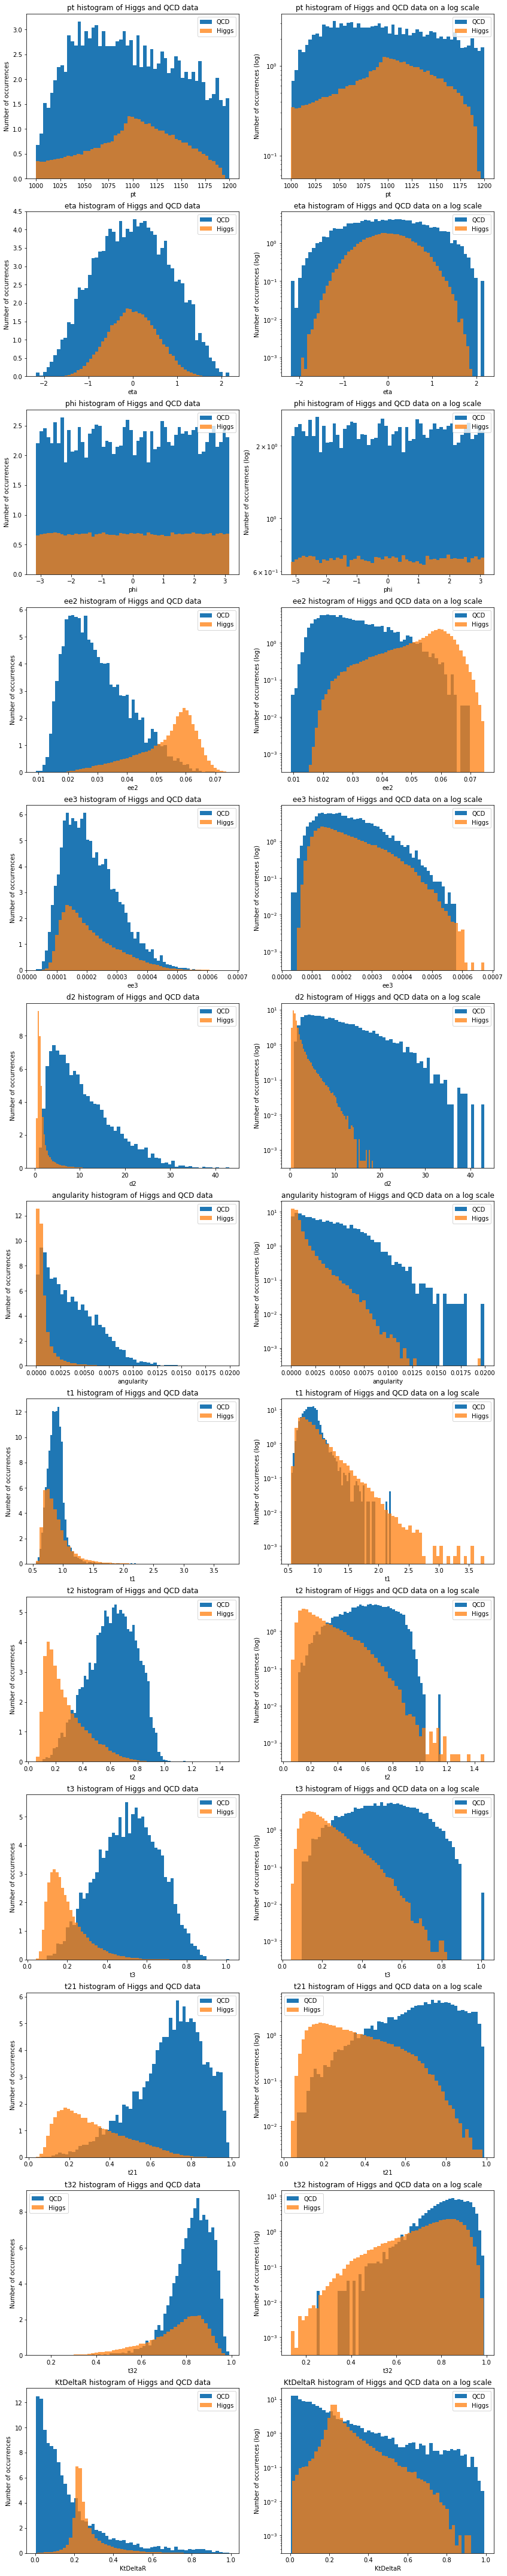

In [33]:
#creating histograms of the rest of the columns in the data with mass cuts
fig, axes = plt.subplots(13, 2, figsize=(14, 6*13))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns[:3].append(higgs_table.columns[4:])):
    ax[0].set_title('{} histogram of Higgs and QCD data'.format(column))
    ax[0].hist(qcd_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='QCD', weights=qcd_weight4*np.ones(len(qcd_table_cut[column])) / len(qcd_table_cut[column]))
    ax[0].hist(higgs_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='Higgs', weights=higgs_weight4*np.ones(len(higgs_table_cut[column])) / len(higgs_table_cut[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data on a log scale'.format(column))
    ax[1].hist(qcd_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='QCD', weights=qcd_weight4*np.ones(len(qcd_table_cut[column])) / len(qcd_table_cut[column]))
    ax[1].hist(higgs_table_cut[column], bins=int(75*len(higgs_table_cut)/100000), label='Higgs', weights=higgs_weight4*np.ones(len(higgs_table_cut[column])) / len(higgs_table_cut[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of the Higgs and QCD data parameters after the mass cuts.

From looking at the new distibutions, it looks like I can make significant cuts on the $D_2$ and angularity data and eliminate little, if any of the Higgs data. This will maximize significance, because $N_{QCD}$ is decreasing, but $N_{Higgs}$ will remain about the same. Making cuts in $\eta$ or $K_t\Delta R$ may be useful as well. However, like with the mass cuts, once I make a cut using one parameter, I must reassess the data, because the distributions of other parameters are likely to change again.

## Problem 4

I am first going to cut the $D_2$ data. I will start by removing the QCD data that is above all of the Higgs data, and see how that improves the significance. Then I will check the rest of the parameters to see if there are other cuts I can make without eliminating any more Higgs data. I will be using the data left from the mass cuts, because that has a different distribution than the original data. For this and any other feature cuts I make, I will be creating a function similar to the one I made to perform mass cuts, replacing the mass information with information of the given feature.

In [228]:
#creating a function to make D_2 cuts
def d2_cut(data, lower, upper):
    mask = (data['d2'] >= lower) & (data['d2'] <= upper)
    cut = data[mask]
    return cut

In [229]:
#cutting out all of the QCD data that has a D2 greater than the greatest D2 of the Higgs
higgs_Dcut = d2_cut(higgs_table_cut, higgs_table_cut['d2'].min(), higgs_table_cut['d2'].max())
qcd_Dcut = d2_cut(qcd_table_cut, higgs_table_cut['d2'].min(), higgs_table_cut['d2'].max())

In [230]:
#finding N for each (N_Higgs should remain the same in this case)
higgs_weightD = new_weight(higgs_table, higgs_Dcut, 50)
qcd_weightD = new_weight(qcd_table, qcd_Dcut, 2000)
print(higgs_weightD)
print(qcd_weightD)

37.9145
110.06


In [37]:
cutD_sig = 37/np.sqrt(111)
print('The new significance of the Higgs data after the D_2 cut: {}'.format(cutD_sig))

The new significance of the Higgs data after the D_2 cut: 3.5118845842842465


This cut does not give a 5$\sigma$ significance. More cuts are needed. Before this, I am plotting the other factors to see how the most recent cut affected the other parameters. If the angularity distribution wasn't affected, I can make cuts on that, again without eliminating any more Higgs data. Or there might be another parameter that has a difference in the Higgs and QCD distributions.

Here I am plotting all of the QCD and Higgs data after the mass and $D_2$ cuts using the same method as before by looping through each data parameter. I will see how the distributions are affected by the most recent data cuts to determine other optimizations to implement.

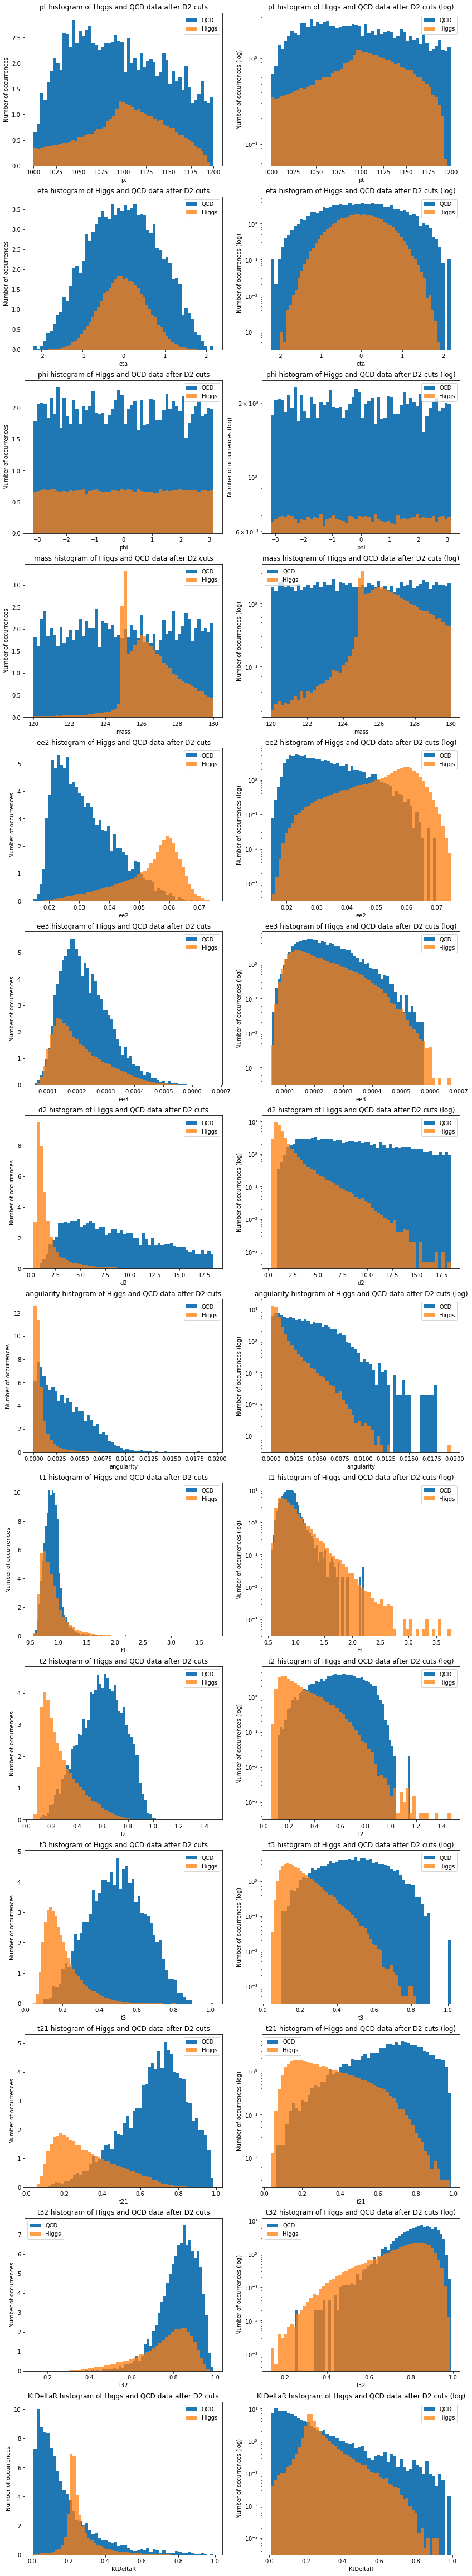

In [38]:
#plotting the data after the D_2 cuts
fig, axes = plt.subplots(14, 2, figsize=(14, 6*14))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns):
    ax[0].set_title('{} histogram of Higgs and QCD data after D2 cuts'.format(column))
    ax[0].hist(qcd_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='QCD', weights=qcd_weightD*np.ones(len(qcd_Dcut[column])) / len(qcd_Dcut[column]))
    ax[0].hist(higgs_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='Higgs', weights=higgs_weightD*np.ones(len(higgs_Dcut[column])) / len(higgs_Dcut[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data after D2 cuts (log)'.format(column))
    ax[1].hist(qcd_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='QCD', weights=qcd_weightD*np.ones(len(qcd_Dcut[column])) / len(qcd_Dcut[column]))
    ax[1].hist(higgs_Dcut[column], bins=int(75*len(higgs_Dcut)/100000), label='Higgs', weights=higgs_weightD*np.ones(len(higgs_Dcut[column])) / len(higgs_Dcut[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of all of the parameters in the LHC data after the mass and $D_2$ eliminations.

When looking at the new plots, making cuts on $t_3$ will probably eliminate the most QCD data. I will be cutting the data based on $t_3$ values to see how the significance increases. Then I will look at these plots again to see where else I can make cuts.

In [231]:
#creating a function to make t3 cuts
def t3_cut(data, lower, upper):
    mask = (data['t3'] >= lower) & (data['t3'] <= upper)
    cut = data[mask]
    return cut

In [232]:
#cutting out all of the QCD data that has a t_3 value less than the Higgs maximum t_3
higgs_T3cut = t3_cut(higgs_Dcut, higgs_Dcut['t3'].min(), higgs_Dcut['t3'].max())
qcd_T3cut = t3_cut(qcd_Dcut, higgs_Dcut['t3'].min(), higgs_Dcut['t3'].max())

In [233]:
#finding N for each, (N_Higgs should remain the same in this case)
higgs_weightT3 = new_weight(higgs_table, higgs_T3cut, 50)
qcd_weightT3 = new_weight(qcd_table, qcd_T3cut, 2000)
print(higgs_weightT3)
print(qcd_weightT3)

37.9145
109.08


In [42]:
cutT3_sig = 37/np.sqrt(110)
print('The new significance of the Higgs data after the t_3 cut: {}'.format(cutT3_sig))

The new significance of the Higgs data after the t_3 cut: 3.5278115802086916


This did not make much of a difference in the significance from the $D_2$ cuts, which gave a significance of about 3.51. I will try cutting a bit more from $t_3$ to try to increase the signficance.

In [235]:
#cutting the data that has t_3 values above 0.6 by using a mask
higgs_T3cut2 = t3_cut(higgs_T3cut, higgs_T3cut['t3'].min(), 0.6)
qcd_T3cut2 = t3_cut(qcd_T3cut, higgs_T3cut['t3'].min(), 0.6)

In [236]:
#finding the new N values
higgs_weightT32 = new_weight(higgs_table, higgs_T3cut2, 50)
qcd_weightT32 = new_weight(higgs_table, qcd_T3cut2, 2000)
print(higgs_weightT32)
print(qcd_weightT32)

37.8515
81.84


In [46]:
#calculating significance
cutT3_sig2 = 37/np.sqrt(82)
print('The new significance of the Higgs data after the second t_3 cut: {}'.format(cutT3_sig2))

The new significance of the Higgs data after the second t_3 cut: 4.085966464769322


Here I am getting closer to 5$\sigma$. I will plot the new distributions to look at how the other parameters changed, using the same method as above.

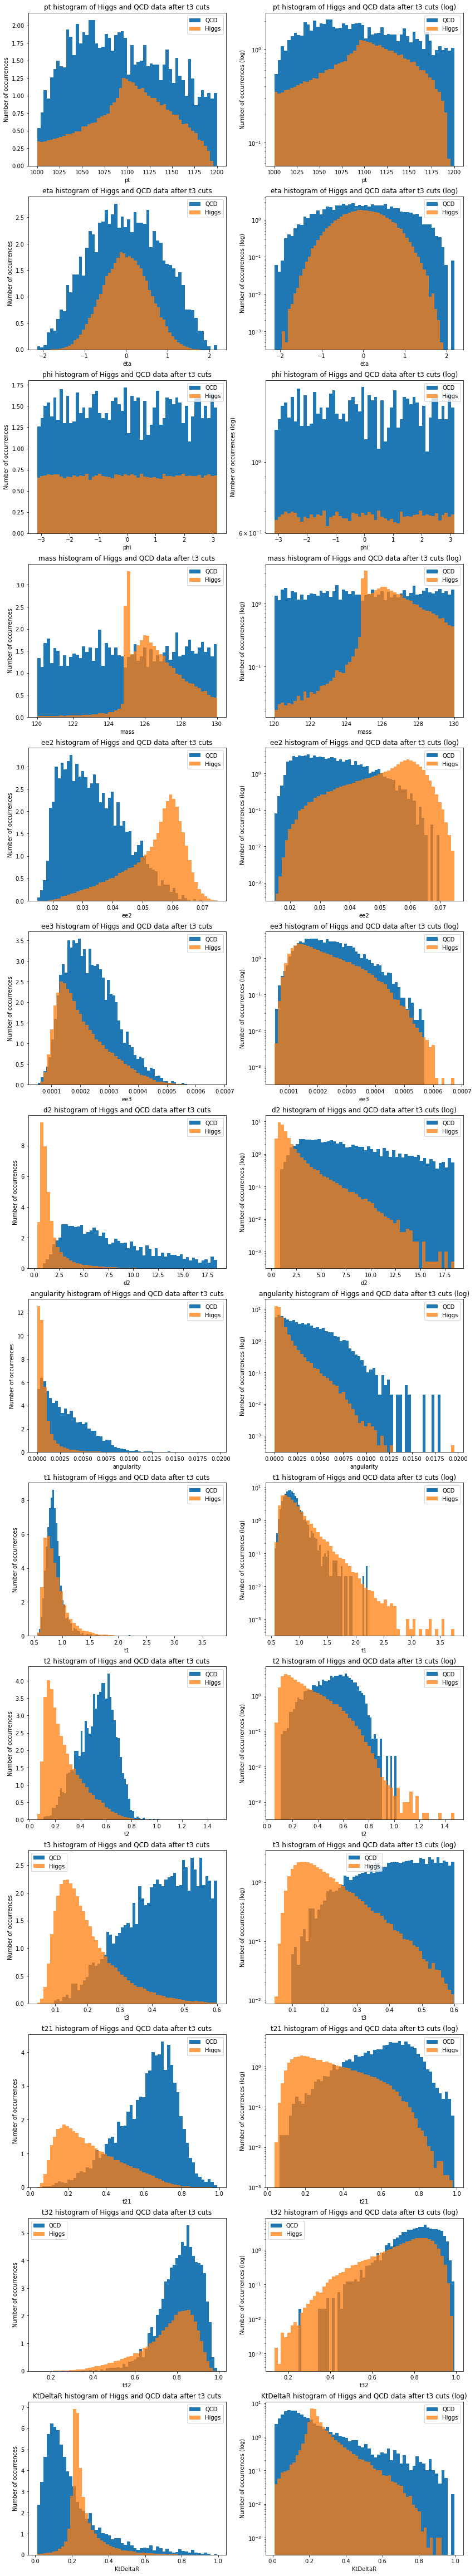

In [47]:
#plotting the data after the t_3 cuts
fig, axes = plt.subplots(14, 2, figsize=(14, 6*14))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, higgs_table.columns):
    ax[0].set_title('{} histogram of Higgs and QCD data after t3 cuts'.format(column))
    ax[0].hist(qcd_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='QCD', weights=qcd_weightT32*np.ones(len(qcd_T3cut2[column])) / len(qcd_T3cut2[column]))
    ax[0].hist(higgs_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='Higgs', weights=higgs_weightT32*np.ones(len(higgs_T3cut2[column])) / len(higgs_T3cut2[column]), alpha = 0.75)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of Higgs and QCD data after t3 cuts (log)'.format(column))
    ax[1].hist(qcd_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='QCD', weights=qcd_weightT32*np.ones(len(qcd_T3cut2[column])) / len(qcd_T3cut2[column]))
    ax[1].hist(higgs_T3cut2[column], bins=int(75*len(higgs_T3cut2)/100000), label='Higgs', weights=higgs_weightT32*np.ones(len(higgs_T3cut2[column])) / len(higgs_T3cut2[column]), alpha = 0.75)
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distribution of the Higgs and QCD parameters after the $t_3$ cut that resulted in a 4.09 $\sigma$ significance.

The rest of the QCD parameters only have small amounts outside of the Higgs distributions, and won't make much of a difference on improving the significance. Now, I will be focusing on what cuts I can make that will remove the most QCD data but the least Higgs data. Any cuts that I do that wouldn't eliminate any Higgs would not make much of a difference in the significance of the Higgs data. In this case, continuing to make cuts in $t_3$ look like they will make the biggest difference.

In [245]:
#making a mask that includes t_3 values of 0.45 or below
higgs_T3cut3 = t3_cut(higgs_T3cut2, higgs_T3cut2['t3'].min(), 0.45)
qcd_T3cut3 = t3_cut(qcd_T3cut2, higgs_T3cut2['t3'].min(), 0.45)

In [246]:
#finding the new N values
higgs_weightT33 = new_weight(higgs_table, higgs_T3cut3, 50)
qcd_weightT33 = new_weight(qcd_table, qcd_T3cut3, 2000)
print(higgs_weightT33)
print(qcd_weightT33)

37.0985
43.66


In [51]:
#calculating the new significance
cutT3_sig2 = 37/np.sqrt(44)
print('The new significance of the Higgs data after the second t_3 cut: {}'.format(cutT3_sig2))

The new significance of the Higgs data after the second t_3 cut: 5.577959874688627


After selcting datapoints that had $t_3$ values of 0.45 or below, I finally got a significance above 5$\sigma$. The final amount of cuts that I did goes as follows: first I selected all events with a measured mass between 120 and 130 GeV, and then I removed any QCD events that had a $D_2$ measurement above the maximum Higgs $D_2$. I finally removed events containing a $t_3$ measurement greater than 4.5. By making these systematic cuts, which are meant to minimize the amount of background that needs to be dealt with, I am maximizing the signal-to-noise ratio (SNR) of the data. This means that the signal will count for more after the cuts than before, which is why it increases the significance of the data. The signal has a greater weight compared to the background, even though there are less signals than before, because I was able to eliminate even more background. To a certain extent, it is better to have a higher SNR that maximizing the number of signals, if that means that the number of background points increases as well.

## Lab 8

Here I will be testing how well my optimization cuts work on some other data. This pseudo-experiment has data that contains both signal and background, and I must apply my cuts to attempt to improve the significance of a possible discovery. There are two different versions of the observed data: high and low luminosity.

I am loading in the pseudo-experiment data using the library 'h5y'. Then I will create similar tables to the tables I made at the beginning of Lab 7 with the simulated data using a pandas dataframe.

In [52]:
#opening the data files
hf_highLumi = h5py.File('data_highLumi_pt_1000_1200.h5', 'r')
hf_lowLumi = h5py.File('data_lowLumi_pt_1000_1200.h5', 'r')

In [53]:
print(hf_highLumi.keys())
print(hf_lowLumi.keys())

<KeysViewHDF5 ['data']>
<KeysViewHDF5 ['data']>


In [54]:
#loading the data from the files into an array so that it can be used in the notebook
highLumi_data = np.array(hf_highLumi.get('data/block0_values'))
highLumi_items = np.array(hf_highLumi.get('data/block0_items'))
lowLumi_data = np.array(hf_lowLumi.get('data/block0_values'))
lowLumi_items = np.array(hf_lowLumi.get('data/block0_items'))

In [198]:
#creating a table of the high luminosity data
highLumi_table = pd.DataFrame(highLumi_data)
highLumi_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

In [199]:
#creating a table of the low luminosity data
lowLumi_table = pd.DataFrame(lowLumi_data)
lowLumi_table.columns = ['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1', 't2', 't3', 't21', 't32', 'KtDeltaR']

## Problem 1

First I am going to plot histograms of each feature, or dimension, in the high luminosity dataset. This will help to visualize the data, and determine if there are any obvious similarities or dissimilarities to the simulated datasets above.

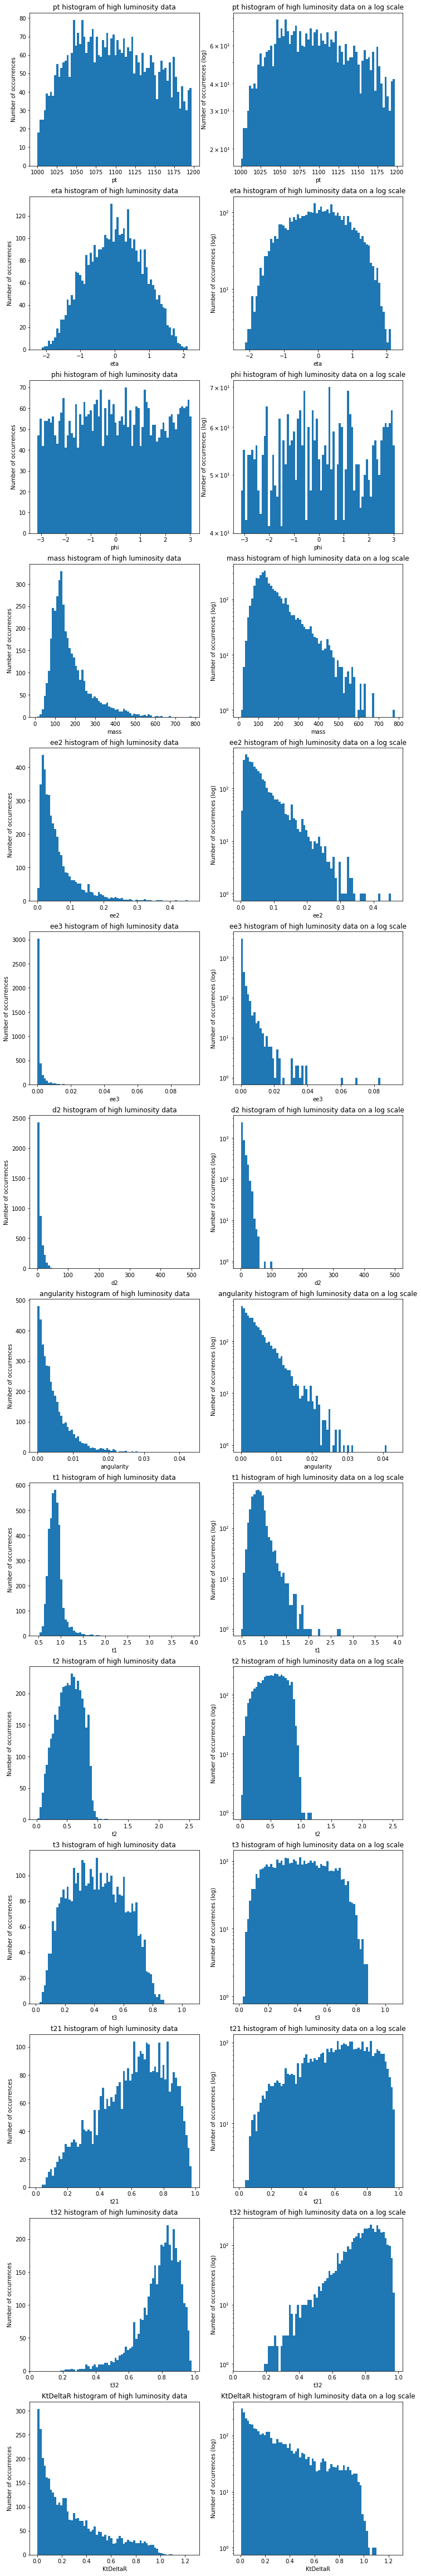

In [267]:
#plotting the raw high luminosity data
fig, axes = plt.subplots(14, 2, figsize=(12, 6*14))
#looping through each subplot and the remaining columns to each of them
for ax, column in zip(axes, highLumi_table.columns):
    ax[0].set_title('{} histogram of high luminosity data'.format(column))
    ax[0].hist(highLumi_table[column], bins=np.arange(qcd_table[column].min(),qcd_table[column].max(),(qcd_table[column].max()-qcd_table[column].min())/75))#, weights=np.ones(len(highLumi_table[column])) / len(highLumi_table[column]))
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[1].set_title('{} histogram of high luminosity data on a log scale'.format(column))
    ax[1].hist(highLumi_table[column], bins=np.arange(qcd_table[column].min(),qcd_table[column].max(),(qcd_table[column].max()-qcd_table[column].min())/75))#, weights=np.ones(len(highLumi_table[column])) / len(highLumi_table[column]))
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')

Distribution of the number of occurences of each feature of the high luminosity pseudo-experimental data on the regular and log scale before any normalization or data cuts.

The pseudo-experimental data, both high and low luminosities, should be normalized to the sum of the expected yields of the Higgs and QCD background data. This is because $N_{Higgs} + N_{QCD}$ represents the expected total number of detections measured, and thus we need the total number of pseudo-detections to equal this expected value, 2050.

Once the data is normalized to the total expected yield, I am plotting the new distribution against the distributions of the sum of the Higgs and QCD distributions. In order to add the two together and preserve their respective normalization factors, I am creating a function that will create a weighted histogram of each and then add them togather.

In [282]:
#adding the qcd and higgs data together
def normed_hist(feature):
    qcd_hist = np.histogram(qcd_table[feature], bins = np.arange(qcd_table[feature].min(),qcd_table[feature].max(),(qcd_table[feature].max()-qcd_table[feature].min())/75), weights=2000*np.ones(len(qcd_table['mass'])) / len(qcd_table['mass']))
    higgs_hist = np.histogram(higgs_table[feature], bins = np.arange(qcd_table[feature].min(),qcd_table[feature].max(),(qcd_table[feature].max()-qcd_table[feature].min())/75), weights=50*np.ones(len(higgs_table['mass'])) / len(higgs_table['mass']))
    normed_hist = np.array([qcd_hist[1][:-1], qcd_hist[0]+higgs_hist[0]])
    return [normed_hist]

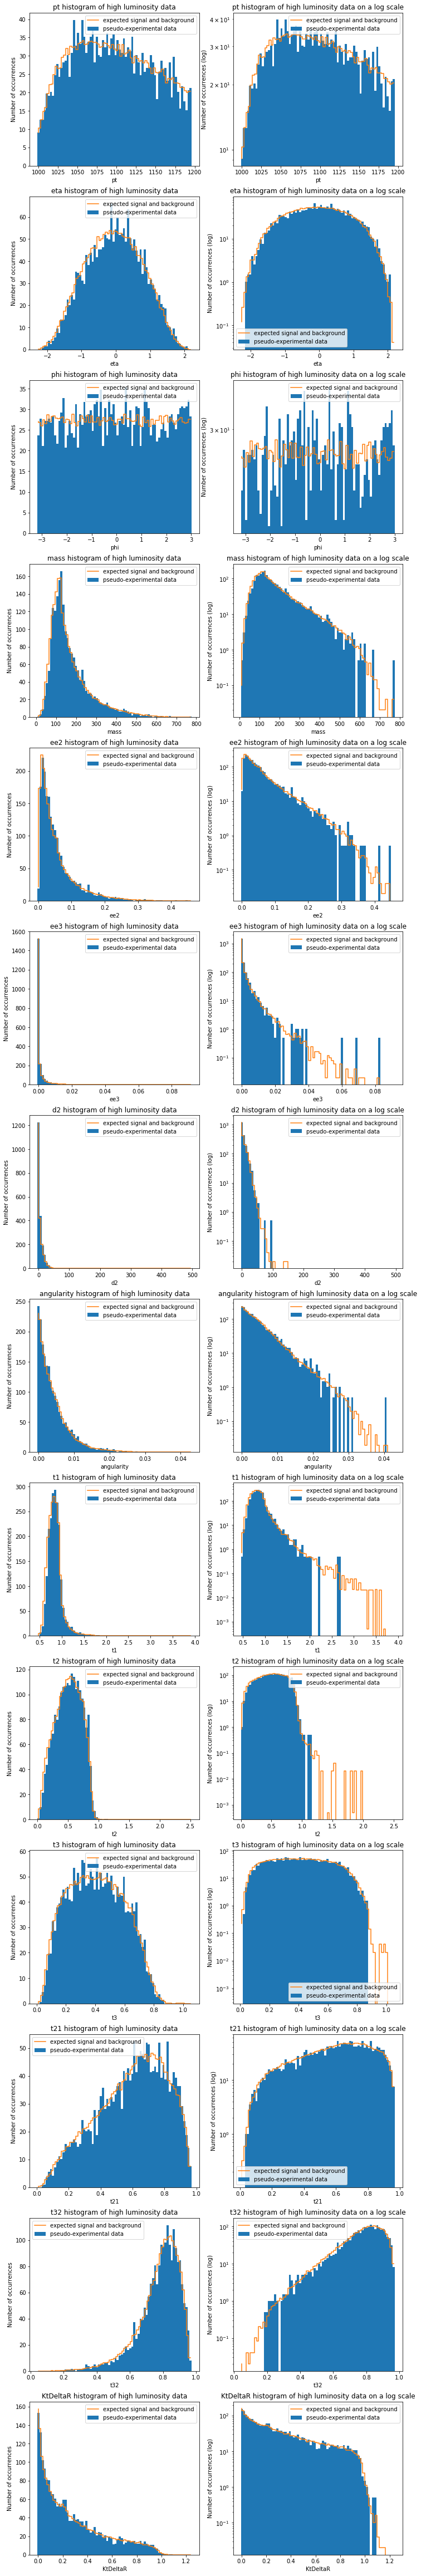

In [283]:
#creating histograms of the high luminosity data and the expected data
fig, axes = plt.subplots(14, 2, figsize=(12, 6*14))
#looping through each subplot and the columns of the dataframe
for ax, column in zip(axes, highLumi_table.columns):
    ax[0].set_title('{} histogram of high luminosity data'.format(column))
    ax[0].hist(highLumi_table[column], bins=np.arange(qcd_table[column].min(),qcd_table[column].max(),(qcd_table[column].max()-qcd_table[column].min())/75), weights=2050*np.ones(len(highLumi_table[column])) / len(highLumi_table[column]), align='left', label='pseudo-experimental data')
    ax[0].step(normed_hist(column)[0][0], normed_hist(column)[0][1], label='expected signal and background')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of high luminosity data on a log scale'.format(column))
    ax[1].hist(highLumi_table[column], bins=np.arange(qcd_table[column].min(),qcd_table[column].max(),(qcd_table[column].max()-qcd_table[column].min())/75), weights=2050*np.ones(len(highLumi_table[column])) / len(highLumi_table[column]), align='left', label='pseudo-experimental data')
    ax[1].step(normed_hist(column)[0][0], normed_hist(column)[0][1], label='expected signal and background')
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distribution of high luminosity data and the expected yield before any cuts made.

Most parameters follow the expected distribtution fairly well. This pseudo-experimental data is supposed to mimic real data, and thus won't be as nice as one would like.

Now it is time to make the parameter cuts. I will be making the same cuts as I made before on the high luminosity data, to test how well they work on experimental data. The data I will be keeping goes as follows: events with masses between 120 and 130 GeV, those with $D_2$ less than or equal to the maximum Higgs $D_2$ value, and events with $t_3$ below 4.5.

In [143]:
#high luminosity mass cut, and the new weight, or N value
highLumi_masscut = mass_cut(highLumi_table, 120, 130)
highLumi_massweight = new_weight(highLumi_table, highLumi_masscut, 2050)
print(highLumi_massweight)

164.86719134284309


In [239]:
#high luminosity d2 cut, and the new weight, or N value
highLumi_d2cut = d2_cut(highLumi_masscut, higgs_table_cut['d2'].min(), higgs_table_cut['d2'].max())
highLumi_d2weight = new_weight(highLumi_table, highLumi_d2cut, 2050)
print(highLumi_d2weight)

150.75012297097885


In [241]:
#high luminosity t3 cut, and the new weight, of N value
highLumi_t3cut = t3_cut(highLumi_d2cut, higgs_table_cut['t3'].min(), 0.45)
highLumi_t3weight = new_weight(highLumi_table, highLumi_t3cut, 2050)
print(highLumi_t3weight)

86.21495327102804


Now that the data has been optimized, I am plotting the new distributions of the high luminosity features. Like before, I will plot them against their expected distributions. This is essentially just to visualize how the dataset has changed since making the cuts and to compare the observed with the expected data.

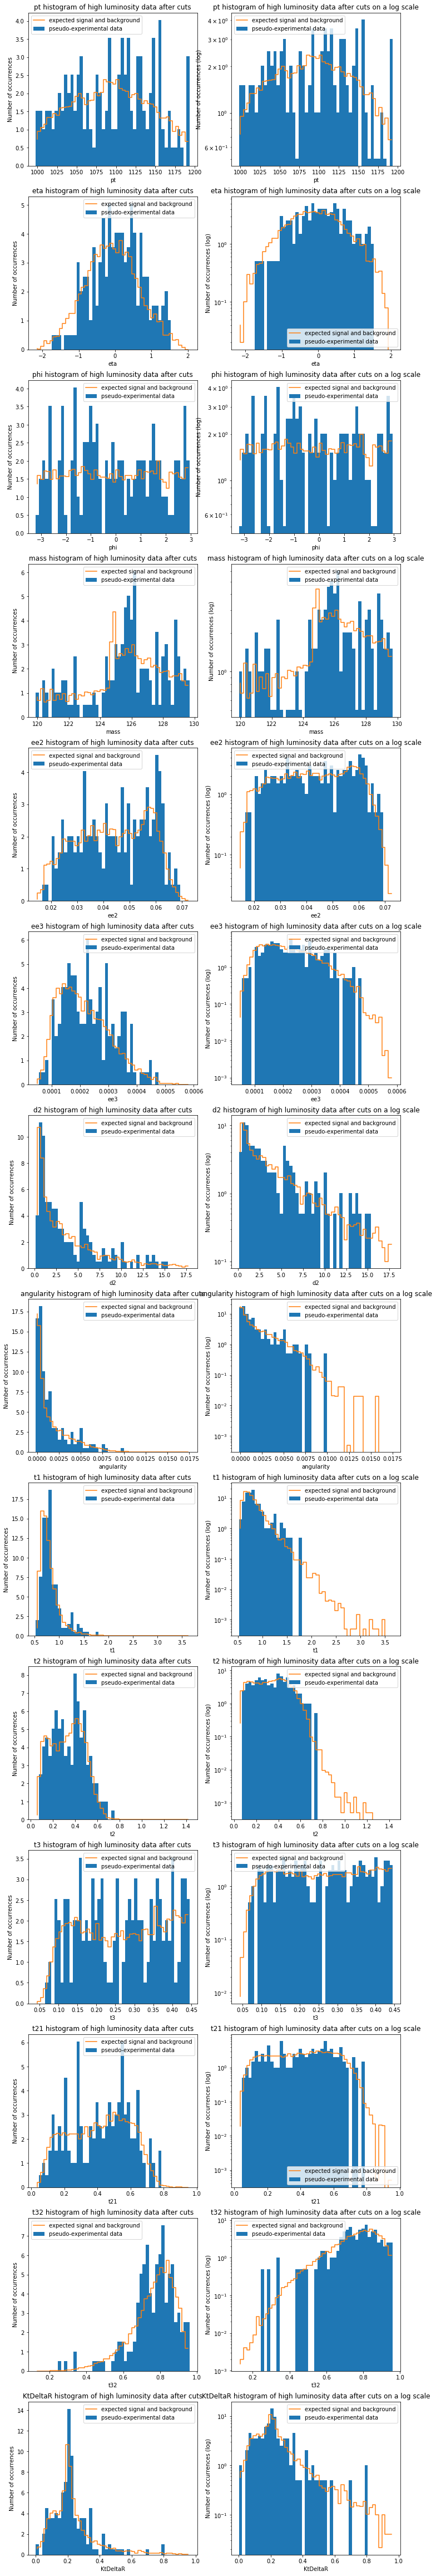

In [284]:
#creating histograms of the data cuts of the high luminosity data
fig, axes = plt.subplots(14, 2, figsize=(12, 6*14))
#looping through each subplot and the columns
for ax, column in zip(axes, highLumi_table.columns):
    hist0= plt.hist(higgs_T3cut3[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
                    weights=higgs_weightT33*np.ones(len(higgs_T3cut3)) / len(higgs_T3cut3))
    hist1 = plt.hist(qcd_T3cut3[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
                     weights=qcd_weightT33*np.ones(len(qcd_T3cut3)) / len(qcd_T3cut3))
    plt.cla()
    ax[0].set_title('{} histogram of high luminosity data after cuts'.format(column))
    new_hist = hist0[0]+hist1[0]
    ax[0].hist(highLumi_t3cut[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
               weights=highLumi_t3weight*np.ones(len(highLumi_t3cut[column])) / len(highLumi_t3cut[column]), align='left', label='pseudo-experimental data')
    ax[0].step(hist1[1][:-1], new_hist, label='expected signal and background')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of high luminosity data after cuts on a log scale'.format(column))
    ax[1].hist(highLumi_t3cut[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
               weights=highLumi_t3weight*np.ones(len(highLumi_t3cut[column])) / len(highLumi_t3cut[column]), align='left', label='pseudo-experimental data')
    ax[1].step(hist1[1][:-1], new_hist, label='expected signal and background')
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distributions of the high luminosity data and simulated, expected data after the parameter cuts have been made.

The observed data still roughly follows the overall trends of the expected values. It is hard to say much on this, since so much of the data has been removed from both datasets. The main takeaway is that the range in data has, in most cases, decreased. Also the distributions are starting to resemble that of the Higgs a bit more.

In order to calculate the signifcance of the high luminosity data, I need to find the N value. This is the number of events corresponding to a signal. I need to get the SNR after the cuts have been made, so that I can test their significance. I am estimating this number by subtracting the background, QCD, distribution, after data cuts, from the high luminosity distribution, also after data cuts. Then I am summing all the values of this new distribution to find the estimated number of Higgs events in the run. I can then use the relation $\frac{N{high luminosity}}{N_{QCD}}$ to find the significance of the data.

Again, I am looping through each parameter in the dataset. I am subtracting the cut QCD from the cut high luminosity data, both with their appropriate normalizations applied, and then plotting the new distributions.

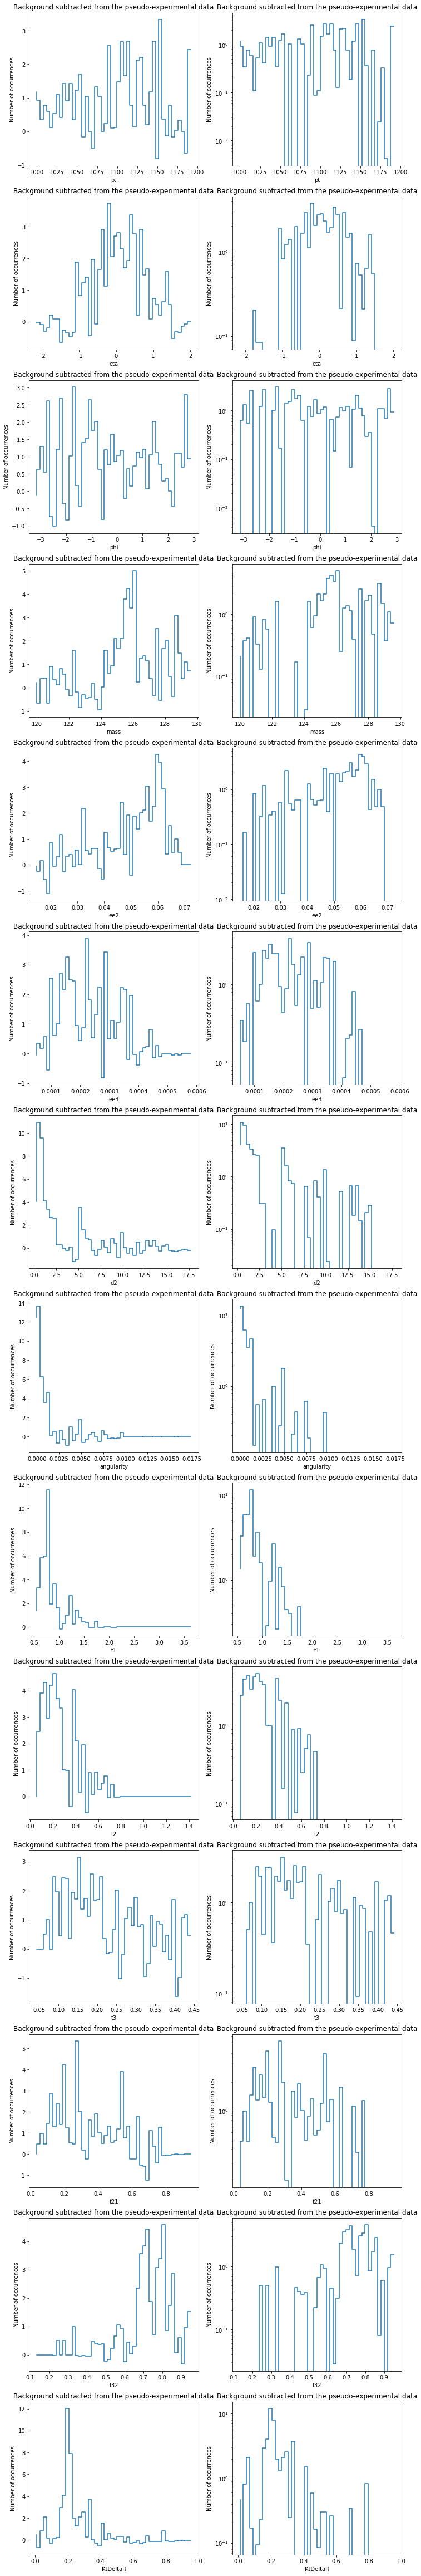

In [329]:
fig, axes = plt.subplots(14, 2, figsize=(12, 6*14))
#looping through each subplot and the columns
for ax, column in zip(axes, highLumi_table.columns):
    hist1 = plt.hist(qcd_T3cut3[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
                     weights=qcd_weightT33*np.ones(len(qcd_T3cut3)) / len(qcd_T3cut3))
    hist2 = plt.hist(highLumi_t3cut[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
               weights=highLumi_t3weight*np.ones(len(highLumi_t3cut[column])) / len(highLumi_t3cut[column]))
    plt.cla()
    new_hist = hist2[0]-hist1[0]
    ax[0].set_title('Background subtracted from the pseudo-experimental data')
    ax[0].step(hist1[1][:-1], new_hist)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[1].set_title('Background subtracted from the pseudo-experimental data')
    ax[1].step(hist1[1][:-1], new_hist)
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences')
    ax[1].set_yscale('log')

Optimized high luminosity distributions after subtracting the background.

Now that I have subtracted the background, I am calculating the number of events left in the luminosity data by summing the values of the new distribution.

In [289]:
hist1 = plt.hist(qcd_T3cut3['mass'], bins=np.arange(pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).min(), pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).max(), (pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).max() - pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).min())/50), 
                     weights=qcd_weightT33*np.ones(len(qcd_T3cut3)) / len(qcd_T3cut3))
hist2 = plt.hist(highLumi_t3cut['mass'], bins=np.arange(pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).min(), pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).max(), (pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).max() - pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).min())/50), 
           weights=highLumi_t3weight*np.ones(len(highLumi_t3cut['mass'])) / len(highLumi_t3cut['mass']))
plt.clf()
new_hist = hist2[0]-hist1[0]

<Figure size 432x288 with 0 Axes>

In [291]:
print('The significance of the high luminosity data: {}'.format(new_hist.sum()/np.sqrt(qcd_weightT33)))

The significance of the high luminosity data: 6.362762896186859


The parameter cuts I made on the expected data work well on the high luminosity data. I got a significance of 6.36$\sigma$, which is above the required threshold for discovery. This is actually a higher significance than the result I got with the expected data, which was 5.58$\sigma$. The cuts increased the SNR, and thus the significance of the observed data more successfully than the expected data.

## Problem 2

Here I will be testing the success of the cuts on the low luminosity pseudo-experimental data. I will be using the same methods as with the high luminosity data, by first plotting the raw low luminosity histograms, and then the normalized histograms against their expected yields counterparts before making any feature cuts.

Plots of the low luminosity histograms before any alterations in order to see what they look like.

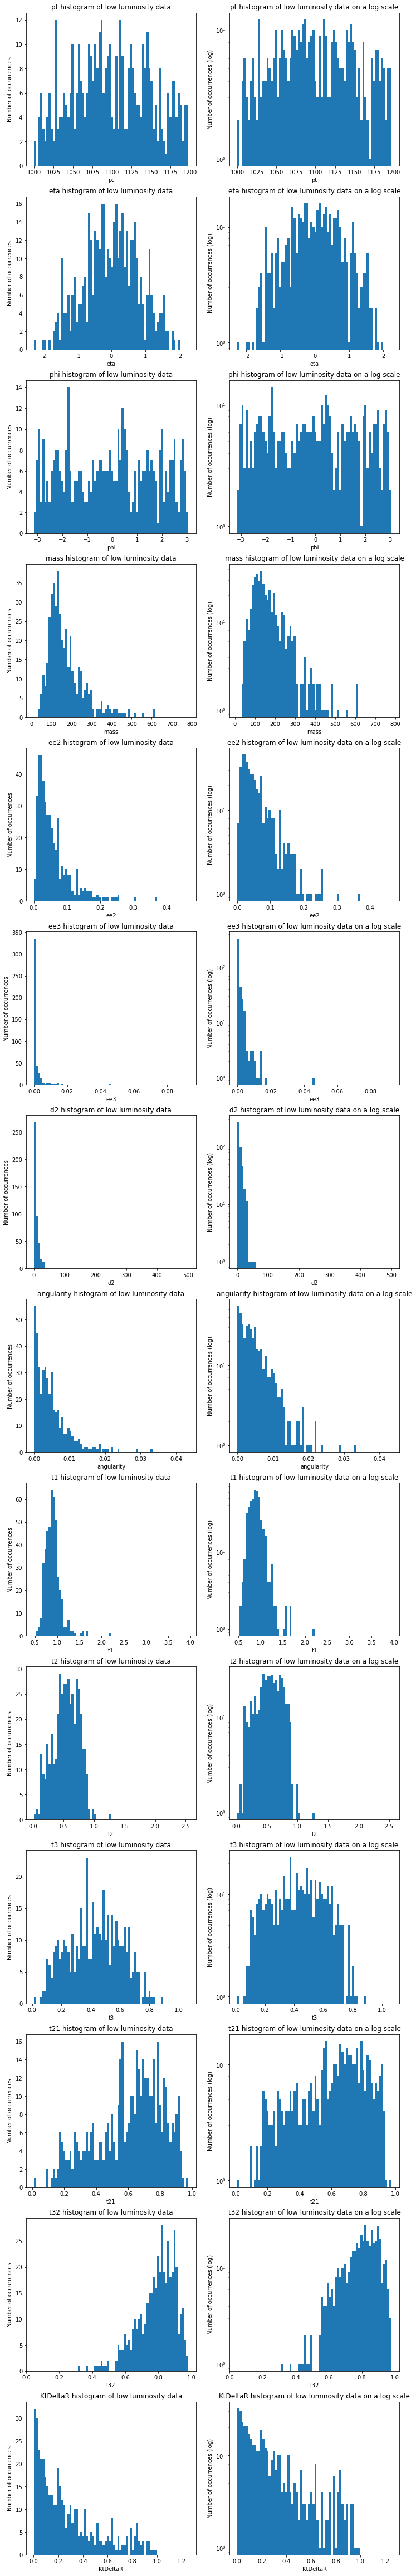

In [266]:
#plotting the raw low luminosity data
fig, axes = plt.subplots(14, 2, figsize=(12, 6*14))
#looping through each subplot and the columns of the dataframe
for ax, column in zip(axes, lowLumi_table.columns):
    ax[0].set_title('{} histogram of low luminosity data'.format(column))
    ax[0].hist(lowLumi_table[column], bins=np.arange(qcd_table[column].min(),qcd_table[column].max(),(qcd_table[column].max()-qcd_table[column].min())/75))#, weights=np.ones(len(highLumi_table[column])) / len(highLumi_table[column]))
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[1].set_title('{} histogram of low luminosity data on a log scale'.format(column))
    ax[1].hist(lowLumi_table[column], bins=np.arange(qcd_table[column].min(),qcd_table[column].max(),(qcd_table[column].max()-qcd_table[column].min())/75))#, weights=np.ones(len(highLumi_table[column])) / len(highLumi_table[column]))
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')

Distribution of the raw low luminosity data, before making any cuts.

The low luminosity data will be normalized to 2050, like the high luminosity data. Like before, I am plotting the low luminosity distribution of each parameter against its expected yield (Higgs+QCD).

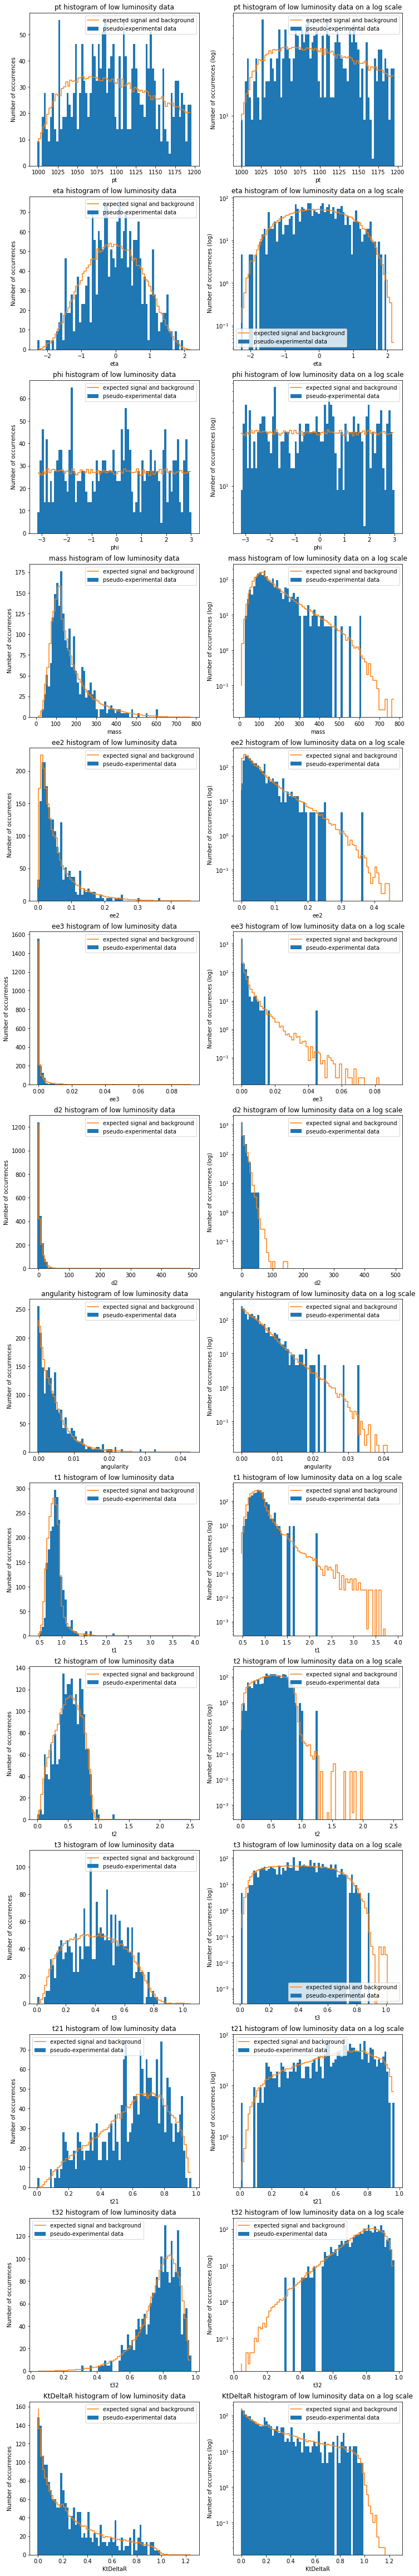

In [294]:
#creating histograms of the pseudo-experimental data
fig, axes = plt.subplots(14, 2, figsize=(12, 6*14))
#looping through each subplot and the columns of the dataframe
for ax, column in zip(axes, lowLumi_table.columns):
    ax[0].set_title('{} histogram of low luminosity data'.format(column))
    ax[0].hist(lowLumi_table[column], bins=np.arange(qcd_table[column].min(),qcd_table[column].max(),(qcd_table[column].max()-qcd_table[column].min())/75), weights=2050*np.ones(len(lowLumi_table[column])) / len(lowLumi_table[column]), align='left', label='pseudo-experimental data')
    ax[0].step(normed_hist(column)[0][0], normed_hist(column)[0][1], label='expected signal and background')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of low luminosity data on a log scale'.format(column))
    ax[1].hist(lowLumi_table[column], bins=np.arange(qcd_table[column].min(),qcd_table[column].max(),(qcd_table[column].max()-qcd_table[column].min())/75), weights=2050*np.ones(len(lowLumi_table[column])) / len(lowLumi_table[column]), align='left', label='pseudo-experimental data')
    ax[1].step(normed_hist(column)[0][0], normed_hist(column)[0][1], label='expected signal and background')
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Normalized low luminosity distribution against the expected data distribution before making any cuts.

The observed data approximately follows the expected distribution for most features. In some dimensions it looks like its range is much less than that of the expected data. Similar trends are appearing. The expected distribtution does not fit the low luminosity data as well as it fits the high luminosity data.

Now I will be making the event selections following the same parameters as before with the high luminosity data. This will serve as a test to see whether my parameter cuts work on low luminosity data as well as high luminosity data. I will be able to compare the parameter cuts on the low luminosity data to the high luminosity data and the expected values.

In [261]:
#low luminosity mass cuts, and the N value
lowLumi_masscut = mass_cut(lowLumi_table, 120, 130)
lowLumi_massweight = new_weight(lowLumi_table, lowLumi_masscut, 2050)
print(lowLumi_massweight)

157.69230769230768


In [262]:
#low luminosity d2 cuts, and the N value
lowLumi_d2cut = d2_cut(lowLumi_masscut, higgs_table_cut['d2'].min(), higgs_table_cut['d2'].max())
lowLumi_d2weight = new_weight(lowLumi_table, lowLumi_d2cut, 2050)
print(lowLumi_d2weight)

148.4162895927602


In [263]:
#low luminosity t3 cuts, and the N value
lowLumi_t3cut = t3_cut(lowLumi_d2cut, higgs_table_cut['t3'].min(), 0.45)
lowLumi_t3weight = new_weight(lowLumi_table, lowLumi_t3cut, 2050)
print(lowLumi_t3weight)

78.84615384615384


Here I am plotting the new distributions of the low luminosity data after the data cuts have been made. Again, I will be plotting this histogram against that of the expected data after the cuts.

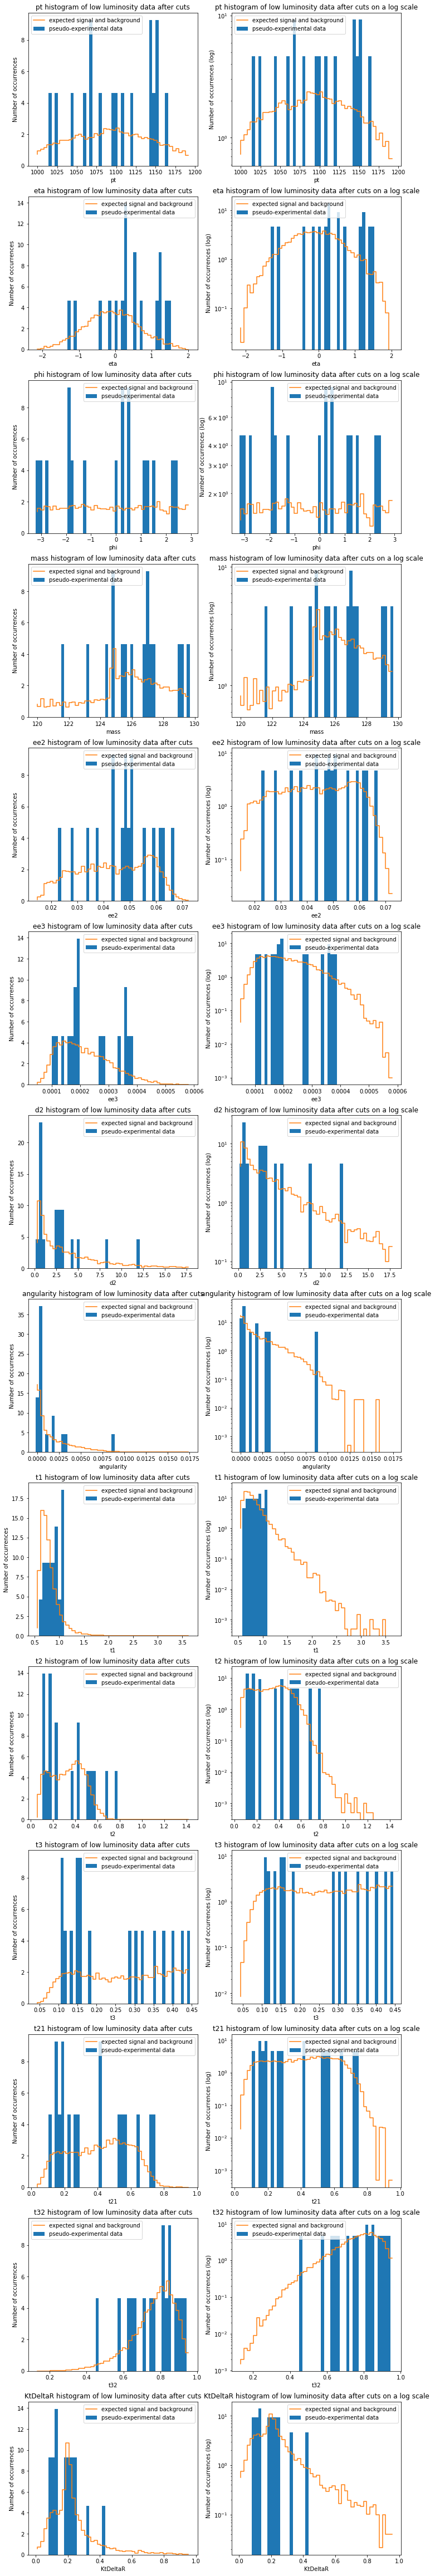

In [293]:
#creating histograms of the data cuts of the pseudo-experimental data
fig, axes = plt.subplots(14, 2, figsize=(12, 6*14))
#looping through each subplot and the columns
for ax, column in zip(axes, lowLumi_table.columns):
    hist0= plt.hist(higgs_T3cut3[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
                    weights=higgs_weightT33*np.ones(len(higgs_T3cut3)) / len(higgs_T3cut3))
    hist1 = plt.hist(qcd_T3cut3[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
                     weights=qcd_weightT33*np.ones(len(qcd_T3cut3)) / len(qcd_T3cut3))
    plt.cla()
    ax[0].set_title('{} histogram of low luminosity data after cuts'.format(column))
    new_hist = hist0[0]+hist1[0]
    ax[0].hist(lowLumi_t3cut[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
               weights=lowLumi_t3weight*np.ones(len(lowLumi_t3cut[column])) / len(lowLumi_t3cut[column]), align='left', label='pseudo-experimental data')
    ax[0].step(hist1[1][:-1], new_hist, label='expected signal and background')
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].legend()
    ax[1].set_title('{} histogram of low luminosity data after cuts on a log scale'.format(column))
    ax[1].hist(lowLumi_t3cut[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
               weights=lowLumi_t3weight*np.ones(len(lowLumi_t3cut[column])) / len(lowLumi_t3cut[column]), align='left', label='pseudo-experimental data')
    ax[1].step(hist1[1][:-1], new_hist, label='expected signal and background')
    ax[1].set_yscale('log')
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences (log)')
    ax[1].legend()

Distribution of the low luminosity data and the simulated, expected data after the parameter cuts were made.

The low luminosity data looks very sparse, and does not follow the expected distribution very well at all. This could be a feature of its sparseness, but even so it does not bode well for its significance. Just by inspection it looks like the SNR is very low.

Like with the high luminosity data, in order to calculate the significance value, I must first find the number of events in the low luminosity data corresponding to a signal. I am doing this again by subtracting the background data from the low luminosity data. This will be an estimate for the distribution of Higgs events. Summing this new distribution will give then number which I will use in the $\frac{N_{low luminosity}}{N_{QCD}}$ calculation.

Plotting the background distribution subtracted from the low luminosity distribution, with the respective weights taken into account.

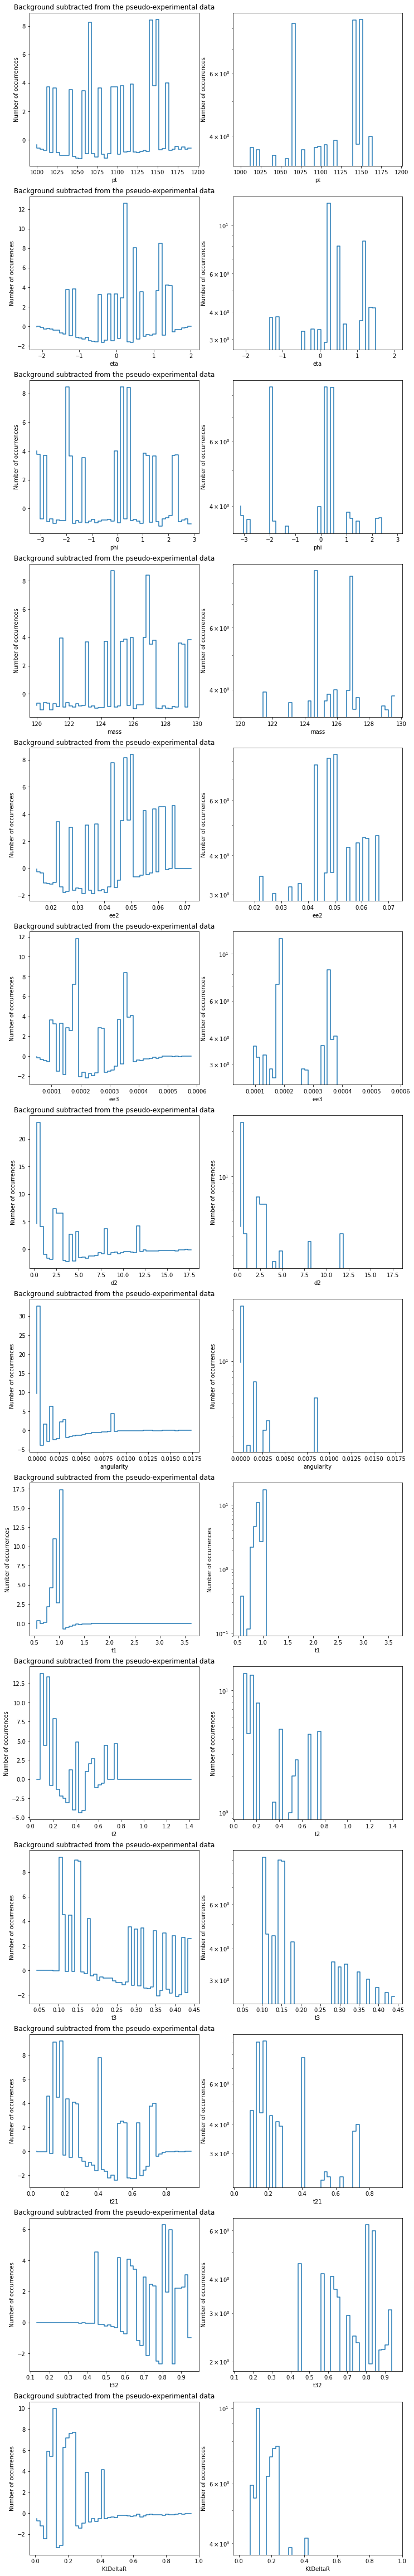

In [295]:
fig, axes = plt.subplots(14, 2, figsize=(12, 6*14))
#looping through each subplot and the columns
for ax, column in zip(axes, lowLumi_table.columns):
    hist1 = plt.hist(qcd_T3cut3[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
                     weights=qcd_weightT33*np.ones(len(qcd_T3cut3)) / len(qcd_T3cut3))
    hist2 = plt.hist(lowLumi_t3cut[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
               weights=lowLumi_t3weight*np.ones(len(lowLumi_t3cut[column])) / len(lowLumi_t3cut[column]))
    plt.cla()
    new_hist = hist2[0]-hist1[0]
    ax[0].set_title('Background subtracted from the pseudo-experimental data')
    ax[0].step(hist1[1][:-1], new_hist)
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Number of occurrences')
    ax[0].set_title('Background subtracted from the pseudo-experimental data')
    ax[1].step(hist1[1][:-1], new_hist)
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Number of occurrences')
    ax[1].set_yscale('log')

Distribution of the low luminosity data with the background removed.

Calculating the new number of signal events using the above distribution, and then finding the significance associated with it.

In [301]:
hist3 = plt.hist(qcd_T3cut3['mass'], bins=np.arange(pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).min(), pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).max(), (pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).max() - pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).min())/50), 
                     weights=qcd_weightT33*np.ones(len(qcd_T3cut3)) / len(qcd_T3cut3))
hist4 = plt.hist(lowLumi_t3cut['mass'], bins=np.arange(pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).min(), pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).max(), (pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).max() - pd.concat([qcd_T3cut3['mass'], higgs_T3cut3['mass']]).min())/50), 
           weights=lowLumi_t3weight*np.ones(len(lowLumi_t3cut['mass'])) / len(lowLumi_t3cut['mass']))
plt.clf()
new_hist2 = hist4[0]-hist3[0]

<Figure size 432x288 with 0 Axes>

In [297]:
print('The significance of the low luminosity data: {}'.format(new_hist2.sum()/np.sqrt(qcd_weightT33)))

The significance of the low luminosity data: 4.774544657409754


As expected from the histograms of the event selected data, the data cuts on the low luminosity were not as successful. The significance of the pseudo-experimental data is 4.77$\sigma$, which is lower than the required significance threshold for discovery. It is also lower than the significances of the high luminosity data and the expected data, 6.36$\sigma$ and 5.58$\sigma$, respectively.

## Problem 3

I am calculating the 95% confidence upper limit on the each of the parameters in the expected dataset and the observed low luminosity dataset. For this I am finding the value below where 95% of data falls using np.quantile() on the low luminosity data with the background subtracted from it (observed) and the Higgs data (expected). Subtracting the background data from the pseudo-experimental data should be equivalent to the observed Higgs data, if there really were Higgs events, because then the data left over is just the signal. I can compare the 95% confidence upper limits this way. I am looping through each parameter of the data to find the upper limit on the "backgroundless" low luminosity, observed data, and that of the expected, Higgs data. Then I am subtracting the expected from the observed limits to see how well they agree.

In [320]:
#making a function to create a weighted array of the background and lowLumi data in order to get the quantile of two arrays with different weights
def weighted_quantile(values, quantiles, sample_weight=None, 
                      values_sorted=False, old_style=False):
    values = np.array(values)
    quantiles = np.array(quantiles)
    if sample_weight is None:
        sample_weight = np.ones(len(values))
    sample_weight = np.array(sample_weight)
    assert np.all(quantiles >= 0) and np.all(quantiles <= 1), \
        'quantiles should be in [0, 1]'

    if not values_sorted:
        sorter = np.argsort(values)
        values = values[sorter]
        sample_weight = sample_weight[sorter]

    weighted_quantiles = np.cumsum(sample_weight) - 0.5 * sample_weight
    if old_style:
        # To be convenient with numpy.percentile
        weighted_quantiles -= weighted_quantiles[0]
        weighted_quantiles /= weighted_quantiles[-1]
    else:
        weighted_quantiles /= np.sum(sample_weight)
    return np.interp(quantiles, weighted_quantiles, values)

In [322]:
#finding the upper limit of the observed data and the expected data
for column in lowLumi_table.columns:
    hist1 = plt.hist(qcd_T3cut3[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
                     weights=qcd_weightT33*np.ones(len(qcd_T3cut3)) / len(qcd_T3cut3))
    hist2 = plt.hist(lowLumi_t3cut[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
               weights=lowLumi_t3weight*np.ones(len(lowLumi_t3cut[column])) / len(lowLumi_t3cut[column]))
    plt.clf()
    new_histo = hist2[0]-hist1[0]
    observed_upperlimit = weighted_quantile(hist1[1][:-1],0.95, sample_weight=(new_histo))
    expected_upperlimit = np.quantile(higgs_T3cut3[column], 0.95)
    print('The expected 95% confidence level upper limit on {}: {}'.format(column, expected_upperlimit))
    print('The observed 95% confidence level upper limit on {}: {}'.format(column, observed_upperlimit))

The expected 95% confidence level upper limit on pt: 1173.75316348203
The observed 95% confidence level upper limit on pt: 1152.5662173935154
The expected 95% confidence level upper limit on eta: 0.9103854088173087
The observed 95% confidence level upper limit on eta: 1.4701280209330432
The expected 95% confidence level upper limit on phi: 2.830311475033702
The observed 95% confidence level upper limit on phi: 1.493674741839742
The expected 95% confidence level upper limit on mass: 129.31574082124817
The observed 95% confidence level upper limit on mass: 129.60002053146764
The expected 95% confidence level upper limit on ee2: 0.06590871274788236
The observed 95% confidence level upper limit on ee2: 0.06663984354412687
The expected 95% confidence level upper limit on ee3: 0.00037746701020501433
The observed 95% confidence level upper limit on ee3: 0.0003746459108986512
The expected 95% confidence level upper limit on d2: 4.572409953829768
The observed 95% confidence level upper limit on

<Figure size 432x288 with 0 Axes>

In [325]:
#finding the difference in the 95% limits
for column in lowLumi_table.columns:
    hist1 = plt.hist(qcd_T3cut3[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
                     weights=qcd_weightT33*np.ones(len(qcd_T3cut3)) / len(qcd_T3cut3))
    hist2 = plt.hist(lowLumi_t3cut[column], bins=np.arange(pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min(), pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max(), (pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).max() - pd.concat([qcd_T3cut3[column], higgs_T3cut3[column]]).min())/50), 
               weights=lowLumi_t3weight*np.ones(len(lowLumi_t3cut[column])) / len(lowLumi_t3cut[column]))
    plt.clf()
    new_histo = hist2[0]-hist1[0]
    observed_upperlimit = weighted_quantile(hist1[1][:-1],0.95, sample_weight=(new_histo))
    expected_upperlimit = np.quantile(higgs_T3cut3[column], 0.95)
    print('The difference in 95% confidence level upper limit on {}: {}'.format(column, observed_upperlimit-expected_upperlimit))

The difference in 95% confidence level upper limit on pt: -21.18694608851456
The difference in 95% confidence level upper limit on eta: 0.5597426121157345
The difference in 95% confidence level upper limit on phi: -1.3366367331939601
The difference in 95% confidence level upper limit on mass: 0.2842797102194652
The difference in 95% confidence level upper limit on ee2: 0.0007311307962445113
The difference in 95% confidence level upper limit on ee3: -2.8210993063631194e-06
The difference in 95% confidence level upper limit on d2: -1.9551142903294765
The difference in 95% confidence level upper limit on angularity: -0.00205183604104076
The difference in 95% confidence level upper limit on t1: -0.20713263819857675
The difference in 95% confidence level upper limit on t2: -0.3234744074353456
The difference in 95% confidence level upper limit on t3: -0.1956475573789286
The difference in 95% confidence level upper limit on t21: 0.1314055431489859
The difference in 95% confidence level upper 

<Figure size 432x288 with 0 Axes>

The 95% confidence level upper limits have a moderate discrepancy, but for the amount of data left from the cuts it is not terrible. Since most of the data has been cut to maximize significance, it makes sense that there would be differences in the confidence levels. If many more trials were run, the difference between the two should decrease.